In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Polybench Experimental Results

This notebook puts together how we run Polybench experiments using the `pb-flow` script, and how we process the run results to get the formatted table.

## Setup

We need to put the `python/` directory into the `PYTHONPATH`. 

In [12]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))

In [3]:
import python.utils.polybench as pb_utils

In [4]:
len(pb_utils.discover_examples('./example/polybench'))

30

In [5]:
options = {
  "baseline": pb_utils.PbFlowOptions(
    pb_dir=os.path.join(pb_utils.get_project_root(), 'example', 'polybench'),
    work_dir=os.path.join(pb_utils.get_project_root(), 'tmp', 'phism', 'pb-flow.baseline'),
    job=30,
    polymer=False,
    cosim=True,
    dataset='MINI',
    cleanup=False,
    loop_transforms=False,
    improve_pipelining=False,
  ),
}

## Run `pb-flow`

In [9]:
pb_utils.pb_flow_runner(options["baseline"])

>>> Starting 30 jobs (work_dir=/mnt/ccnas2/bdp/rz3515/projects/phism/tmp/phism/pb-flow.baseline) ...
>>> Finished trmm            elapsed: 12.221000 secs   Status: 1  Error: "vitis_hls /mnt/ccnas2/bdp/rz3515/projects/phism/tmp/phism/pb-flow.baseline/linear-algebra/blas/trmm/phism.tcl failed."
>>> Finished deriche         elapsed: 13.143131 secs   Status: 1  Error: "vitis_hls /mnt/ccnas2/bdp/rz3515/projects/phism/tmp/phism/pb-flow.baseline/medley/deriche/phism.tcl failed."
>>> Finished nussinov        elapsed: 132.578448 secs   Status: 0  Error: "No Error"
>>> Finished floyd-warshall  elapsed: 134.289568 secs   Status: 0  Error: "No Error"
>>> Finished jacobi-1d       elapsed: 230.243495 secs   Status: 0  Error: "No Error"
>>> Finished bicg            elapsed: 239.370880 secs   Status: 0  Error: "No Error"
>>> Finished atax            elapsed: 240.693122 secs   Status: 0  Error: "No Error"
>>> Finished mvt             elapsed: 244.970556 secs   Status: 0  Error: "No Error"
>>> Finished 

## Results

Here we list all the results as a table.

In [13]:
baseline = pb_utils.to_pandas(pb_utils.process_pb_flow_result_dir(options['baseline'].work_dir, options['baseline']))
baseline

,name,phism_synth,tbgen_cosim,phism_cosim,latency,csim_latency,syn_latency,DSP_usage,FF_usage,LUT_usage,BRAM_18K_usage,URAM_usage,DSP_avail,FF_avail,LUT_avail,BRAM_18K_avail,URAM_avail
0,2mm,SUCCESS,SUCCESS,SUCCESS,100243,92642,100243,15,2027,2796,0,0,220,106400,53200,280,0
1,3mm,SUCCESS,SUCCESS,SUCCESS,172834,143531,172834,18,1997,3093,0,0,220,106400,53200,280,0
2,adi,SUCCESS,SUCCESS,SUCCESS,768301,768392,768301,14,2604,3658,0,0,220,106400,53200,280,0
3,atax,SUCCESS,SUCCESS,SUCCESS,4339,12243,4339,16,1936,3204,0,0,220,106400,53200,280,0
4,bicg,SUCCESS,SUCCESS,SUCCESS,12821,10163,12821,15,1869,2237,0,0,220,106400,53200,280,0
5,cholesky,SUCCESS,SUCCESS,SUCCESS,175132,179578,None,14,1747,2922,0,0,220,106400,53200,280,0
6,correlation,SUCCESS,SUCCESS,NO_LOG,None,None,None,16,3025,5067,0,0,220,106400,53200,280,0
7,covariance,SUCCESS,SUCCESS,SUCCESS,39435,103199,None,16,2435,3999,0,0,220,106400,53200,280,0
8,deriche,CANNOT_SYNTH,NO_LOG,NO_LOG,None,None,None,None,None,None,None,None,None,None,None,None,None
9,doitgen,SUCCESS,SUCCESS,SUCCESS,94161,80961,94161,14,1441,2223,0,0,220,106400,53200,280,0


Text(0.5, 1.0, 'Compare latency between Phism and CSim.')

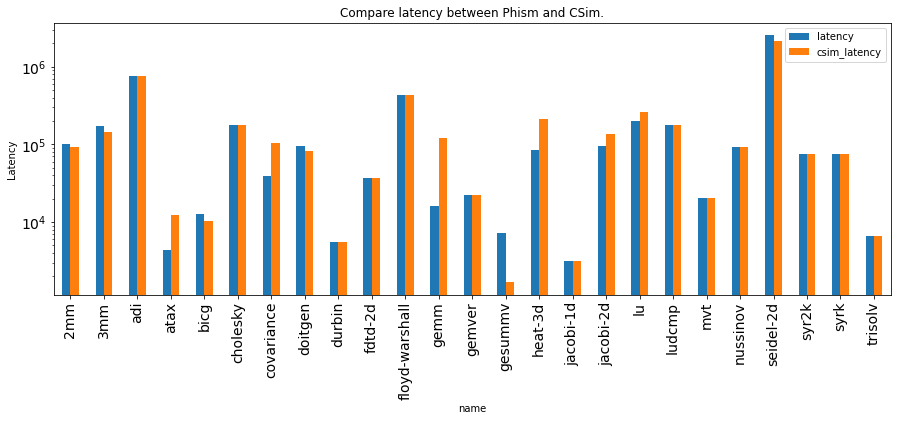

In [32]:
df = baseline[(baseline['latency'] & baseline['csim_latency'])]
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
df.plot(x='name', y=['latency', 'csim_latency'], kind='bar', ax=ax, fontsize=14)
ax.set_yscale('log')
ax.set_ylabel('Latency')
ax.set_title('Compare latency between Phism and CSim.')